<h1 align='center'; color ='blue'><b><font color='pickle'></p>Spam Detection HW</b></h1>

<font color = 'indianred' size = 4 >**Read complete instructions before starting the HW** </font>


# <font color='pickle'> **Q1: Load the dataset  (1 Point)**

- For this Hw you will usespam dataset from kaggle which can be found from [this](https://www.kaggle.com/uciml/sms-spam-collection-dataset) link. You can download this data and either upload it in google drive or in colab workspace. Load the data in pandas dataframe.

- There are only two useful columns. These columns are related to (1) label (ham and spam) and the (2) text of email.

- Rename columns as label and message

- Find the %  ham amd spam in the data.





In [ ]:
# import libraries
import pandas as pd
from pathlib import Path
import zipfile
import tarfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
base_path = '/content/drive/MyDrive/datasets'

In [ ]:
base_folder = Path(base_path)

In [ ]:
archive_folder = base_folder/'archive'
data_folder = base_folder/'data'

In [ ]:
file_csv = data_folder / 'spam.csv'

In [ ]:
df = pd.read_csv(file_csv, encoding = 'ISO-8859-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [ ]:
df = df.rename(columns={"v1": "label", "v2": "message"})

In [ ]:
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [ ]:
ham_per = (df['label'].value_counts()['ham'])/(len(df['label']))
ham_per

0.8659368269921034

In [ ]:
spam_per = (df['label'].value_counts()['spam'])/(len(df['label']))
spam_per

0.13406317300789664

# <font color='pickle'> **Q2 : Provide the metric for evaluating model (1 Point)**</font>

As you will notice, the  data is highly imbalanced (most messages are labelled as ham and only few are labelled as spam). Always predicting ham will give us very good accuracy (close to 90%). So you need to choose a different metric.

Task: Provde the metric you will choose to evaluate your model. Explain why this is an appropriate metric for this case.

I will be using the F1 score as the metric in this case

# <font color='pickle'> **Q3 : Classification Pipelines (18 Points)**</font>

In the previous lectures you learned Data processing, Featurization such as CountVectorizer, TFIDFVectorizer, and also Feature Engineering.
* You will now use folllowing methods to create fearures which you can use in your model.

    1. Sparse Embeddings (TF-IDF) (6 Points)
    2. Feature Engineering (see examples below) (6 Points)
    3. Sparse Embeddings (TF-IDF) + Feature Engineering (6 Points)

**Approach:**

<font color='indianred'> ****Use a smaller subset of dataset (e.g. 10 %) to evaluate the three pipelines . Based on your analysis (e.g. model score, learning curves) , choose one pipeline from the three. Provde your rational for choosing the pipleine. Train only the final pipeline on randomly selected larger subset (e.g. 40%) of the data.** </font>

**Requirements:**

1. You can use any ML model (Logistic Regression, XgBoost) for the classification. You will need to tune the **model for imbalanced dataset** (The link on XGBoost tutorial for imbalanced data: https://machinelearningmastery.com/xgboost-for-imbalanced-classification/).

2. For feature engineering, you can choose from the examples below. You do not  have to use all of them. You can add other featues as well. Think about what faetures can distinguish a spam from a regular email. Some examples :

>> Count of following  (Words, characters, digits, exclamation marks, numbers, Nouns, ProperNouns, AUX, VERBS, Adjectives, named entities, spelling mistakes (see the link on how to get spelling mistakes https://pypi.org/project/pyspellchecker/).

3. For Sparse embeddings you will use **tfidf vectorization**. You need to choose appopriate parameters e.g. min_df, max_df, max_faetures, n-grams etc.).

4. Think carefully about the pre-processing you will do.

Tip: <font color = 'indianred'>**Using GridSearch for hyperparameter tuning might take a lot of time. Try using RandomizedSearch.**</font> You can also explore faster implementation of Gridsearch and RandomizedSearch in sklearn:

1. [Halving Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingGridSearchCV.html?highlight=halving#sklearn.model_selection.HalvingGridSearchCV)

2. [HalvingRandomSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.HalvingRandomSearchCV.html?highlight=halving#sklearn.model_selection.HalvingRandomSearchCV)





# **Required Submissions:**
1.  Submit two colab/jupyter notebooks
- (analysis with smaller subset and all three pipelines)
- (analysis with bigger subset and only final pipeline)
2. Pdf version of the notebooks (HWs will not be graded if pdf version is not provided.
3. **The notebooks and pdf files should have the output.**
4. **Name files as follows : FirstName_file1_hw2, FirstName_file2_h2**

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from pathlib import Path
import textwrap as tw
import matplotlib.pyplot as plt

# save and load models
import joblib

import re

#from scipy.sparse import hstack
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from  sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [ ]:
data_folder = base_folder/'data'
model_folder = base_folder/'models'
custom_functions = base_folder/'custom-functions'

In [ ]:
import sys
sys.path.append(str(custom_functions))
import custom_preprocessor as cp
from  featurizer import ManualFeatures
from  plot_learning_curve import plot_learning_curve

In [ ]:
df1 = df.sample(frac = 0.1, replace=True, random_state=1)

In [ ]:
df1

,label,message
5157,ham,K k:) sms chat with me.
235,ham,I have printed it oh. So &lt;#&gt; come upst...
3980,ham,Huh i cant thk of more oredi how many pages do...
5192,ham,Oh oh... Den muz change plan liao... Go back h...
905,ham,Hey what's up charles sorry about the late reply.
...,...,...
1712,ham,o turns out i had stereo love on mi phone unde...
412,ham,Okies... I'll go yan jiu too... We can skip ar...
4891,ham,Miserable. They don't tell u that the side eff...
1835,ham,* Will be september by then!


In [ ]:
df1_train = df.sample(frac = 0.1, replace=True, random_state=1)

In [ ]:
df1_train

,label,message
5157,ham,K k:) sms chat with me.
235,ham,I have printed it oh. So &lt;#&gt; come upst...
3980,ham,Huh i cant thk of more oredi how many pages do...
5192,ham,Oh oh... Den muz change plan liao... Go back h...
905,ham,Hey what's up charles sorry about the late reply.
...,...,...
1712,ham,o turns out i had stereo love on mi phone unde...
412,ham,Okies... I'll go yan jiu too... We can skip ar...
4891,ham,Miserable. They don't tell u that the side eff...
1835,ham,* Will be september by then!


In [ ]:
df1_test = df.sample(frac = 0.1, replace=True, random_state=2)

In [ ]:
df1_test

,label,message
2575,ham,Now thats going to ruin your thesis!
3606,ham,I have no idea where you are
2514,ham,Ok ill send you with in &lt;DECIMAL&gt; ok.
1099,ham,Been up to ne thing interesting. Did you have ...
3335,ham,Then u go back urself lor...
...,...,...
225,ham,Would really appreciate if you call me. Just n...
3912,ham,Yeah whatever lol
3464,ham,"Haha figures, well I found the piece and prisc..."
561,ham,Thanx 4 e brownie it's v nice...


In [ ]:
df1_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 5157 to 2195
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    557 non-null    object
 1   message  557 non-null    object
dtypes: object(2)
memory usage: 13.1+ KB


In [ ]:
df1_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 2575 to 1657
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    557 non-null    object
 1   message  557 non-null    object
dtypes: object(2)
memory usage: 13.1+ KB


In [ ]:
df1_train['label'].value_counts()

ham     484
spam     73
Name: label, dtype: int64

In [ ]:
df1_test['label'].value_counts()

ham     484
spam     73
Name: label, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = df1_train['message'].values, df1_test['message'].values, df1_train['label'].values, df1_test['label'].values

print(f'X_train: {X_train.shape} y_train: {y_train.shape}')
print(f'X_test: {X_test.shape} y_test: {y_test.shape}')

X_train: (557,) y_train: (557,)
X_test: (557,) y_test: (557,)


In [ ]:
X_train_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(X_train)

In [ ]:
X_train_cleaned_sparse_embed = data_folder /'x_train_cleaned_sparse_embed.pkl'

In [ ]:
joblib.dump(X_train_cleaned, X_train_cleaned_sparse_embed)

['/content/drive/MyDrive/datasets/data/x_train_cleaned_sparse_embed.pkl']

In [ ]:
X_test_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(X_test)

In [ ]:
X_test_cleaned_sparse_embed = data_folder / 'x_test_cleaned_sparse_embed.pkl'

In [ ]:
joblib.dump(X_test_cleaned, X_test_cleaned_sparse_embed)

['/content/drive/MyDrive/datasets/data/x_test_cleaned_sparse_embed.pkl']

In [ ]:
#pipeline 1
classifier_1a = Pipeline([('vectorizer', TfidfVectorizer(analyzer='word', token_pattern=r"[\S]+")),
                         ('classifier', LogisticRegression(max_iter = 10000)),
                        ])

In [ ]:
param_grid_classifier_1a = {'vectorizer__max_features': [100, 500, 1000, 2000, 5000],

                           'classifier__C': [ 0.1, 1, 10, 100, 100000]}

In [ ]:
grid_classifier_1a = GridSearchCV(estimator=classifier_1a, param_grid=param_grid_classifier_1a, cv = 3, scoring='f1_micro')

In [ ]:
GridSearchCV??

In [ ]:
X_trained_cleaned = joblib.load(X_train_cleaned_sparse_embed)
grid_classifier_1a.fit(X_trained_cleaned, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('vectorizer',
                                        TfidfVectorizer(token_pattern='[\\S]+')),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10, 100, 100000],
                         'vectorizer__max_features': [100, 500, 1000, 2000,
                                                      5000]},
             scoring='f1_micro')

In [ ]:
print(f'Best cross-validation score: {grid_classifier_1a.best_score_:.2f}')
print("\nBest parameters: ", grid_classifier_1a.best_params_)
print("\nBest estimator: ", grid_classifier_1a.best_estimator_)

Best cross-validation score: 0.97

Best parameters:  {'classifier__C': 100000, 'vectorizer__max_features': 2000}

Best estimator:  Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=2000, token_pattern='[\\S]+')),
                ('classifier', LogisticRegression(C=100000, max_iter=10000))])


In [ ]:
file_model_sparse_embed = model_folder / 'sparse_embed_model.pkl'

In [ ]:
joblib.dump(grid_classifier_1a.best_estimator_, file_model_sparse_embed)

['/content/drive/MyDrive/datasets/models/sparse_embed_model.pkl']

In [ ]:
# load the saved model
loaded_model_sparse_embed = joblib.load(file_model_sparse_embed)

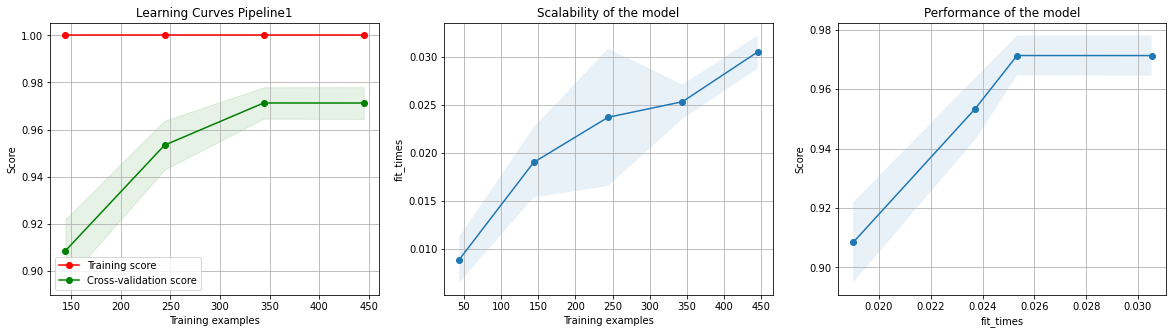

In [ ]:
# plot learning curces
# This cell can take upto 30 minutes to run
plot_learning_curve(loaded_model_sparse_embed, 'Learning Curves Pipeline1', X_train_cleaned, y_train)
plt.show()

In [ ]:
grid_classifier_sparse_embed = loaded_model_sparse_embed.score(X_train_cleaned, y_train)
print(f'Accuracy on train set  is {grid_classifier_sparse_embed}')

Accuracy on train set  is 1.0


In [ ]:
def final_pipeline(text):
  # cleaned_text = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(text)
  cleaned_text = joblib.load(X_test_cleaned_sparse_embed)
  predictions = loaded_model_sparse_embed.predict(cleaned_text)
  return predictions

In [ ]:
y_test_pred = final_pipeline(X_test)

In [ ]:
y_test_pred[0:10]

array(['ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham'], dtype=object)

In [ ]:
print('\nTest set classification report:\n\n',classification_report(y_test, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

         ham       0.96      0.99      0.98       484
        spam       0.95      0.75      0.84        73

    accuracy                           0.96       557
   macro avg       0.96      0.87      0.91       557
weighted avg       0.96      0.96      0.96       557



In [ ]:
#pipeline 2
featurizer =  ManualFeatures(spacy_model='en_core_web_sm')

In [ ]:
X_train_features, feature_names = featurizer.fit_transform(X_train)

In [ ]:
X_train_features[0:3]

array([[ 6.        , 20.        , 15.        ,  2.5       ,  0.        ,
         0.        ,  0.        ,  3.        ,  0.        ,  1.        ,
         1.        ],
       [ 9.        , 49.        , 37.        ,  4.11111111,  0.        ,
         0.        ,  0.        ,  1.        ,  1.        ,  2.        ,
         0.        ],
       [14.        , 55.        , 42.        ,  3.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  2.        ,  1.        ,
         3.        ]])

In [ ]:
feature_names

['count_words',
 'count_characters',
 'count_characters_no_space',
 'avg_word_length',
 'count_digits',
 'count_numbers',
 'noun_count',
 'aux_count',
 'verb_count',
 'adj_count',
 'ner']

In [ ]:
classifier_1b = Pipeline([('classifier', LogisticRegression(max_iter = 10000)),
                        ])

In [ ]:
param_grid_classifier_1b = {'classifier__C': [0.01, 10, 1000, 100000]}

In [ ]:
grid_classifier_1b = GridSearchCV(estimator=classifier_1b, param_grid=param_grid_classifier_1b, cv = 3, scoring = 'f1_micro')

In [ ]:
grid_classifier_1b.fit(X_train_features, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.01, 10, 1000, 100000]},
             scoring='f1_micro')

In [ ]:
print("Best cross-validation score: {:.2f}".format(grid_classifier_1b.best_score_))
print("\nBest parameters: ", grid_classifier_1b.best_params_)
print("\nBest estimator: ", grid_classifier_1b.best_estimator_)

Best cross-validation score: 0.98

Best parameters:  {'classifier__C': 10}

Best estimator:  Pipeline(steps=[('classifier', LogisticRegression(C=10, max_iter=10000))])


In [ ]:
file_model_features = model_folder / 'features_model.pkl'

In [ ]:
joblib.dump(grid_classifier_1b.best_estimator_, file_model_features)

['/content/drive/MyDrive/datasets/models/features_model.pkl']

In [ ]:
loaded_final_model_features = joblib.load(file_model_features)

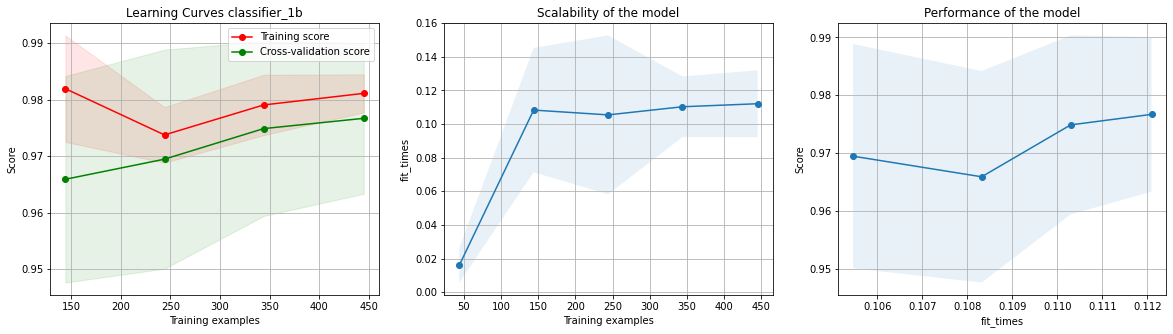

In [ ]:
plot_learning_curve(loaded_final_model_features, 'Learning Curves classifier_1b', X_train_features, y_train)
plt.show()

In [ ]:
grid_classifier_sparse_embed = loaded_final_model_features.score(X_train_features, y_train)
print(f'Accuracy on train set  is {grid_classifier_sparse_embed}')

Accuracy on train set  is 0.9802513464991023


In [ ]:
def final_pipeline(text):
  test_features, feature_names = featurizer.fit_transform(X_test)
  predictions = loaded_final_model_features.predict(test_features)
  return predictions

In [ ]:
y_test_pred = final_pipeline(X_test)

In [ ]:
print('\nTest set classification report:\n\n',classification_report(y_test, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       484
        spam       0.96      0.90      0.93        73

    accuracy                           0.98       557
   macro avg       0.97      0.95      0.96       557
weighted avg       0.98      0.98      0.98       557



In [ ]:
#pipeline 3
X_train_final = pd.concat((pd.DataFrame(X_train_cleaned, columns =['cleaned_text']),
                           pd.DataFrame(X_train_features, columns=feature_names)),axis =1)

In [ ]:
X_train_final.head()

,cleaned_text,count_words,count_characters,count_characters_no_space,avg_word_length,count_digits,count_numbers,noun_count,aux_count,verb_count,adj_count,ner
0,k k sm chat,6.0,20.0,15.0,2.500000,0.0,0.0,0.0,3.0,0.0,1.0,1.0
1,print oh lt;#&gt come upstairs,9.0,49.0,37.0,4.111111,0.0,0.0,0.0,1.0,1.0,2.0,0.0
2,huh not thk oredi page,14.0,55.0,42.0,3.000000,0.0,0.0,0.0,1.0,2.0,1.0,3.0
3,oh oh den muz change plan liao yan jiu,14.0,60.0,47.0,3.357143,0.0,0.0,0.0,7.0,1.0,1.0,0.0
4,hey charle sorry late reply,10.0,49.0,40.0,4.000000,0.0,0.0,0.0,2.0,1.0,0.0,2.0


In [ ]:
X_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cleaned_text               557 non-null    object 
 1   count_words                557 non-null    float64
 2   count_characters           557 non-null    float64
 3   count_characters_no_space  557 non-null    float64
 4   avg_word_length            557 non-null    float64
 5   count_digits               557 non-null    float64
 6   count_numbers              557 non-null    float64
 7   noun_count                 557 non-null    float64
 8   aux_count                  557 non-null    float64
 9   verb_count                 557 non-null    float64
 10  adj_count                  557 non-null    float64
 11  ner                        557 non-null    float64
dtypes: float64(11), object(1)
memory usage: 52.3+ KB


In [ ]:
subset = X_train_final[0:10]

In [ ]:
subset.shape

(10, 12)

In [ ]:
from sklearn.base import TransformerMixin, BaseEstimator
from scipy.sparse import csr_matrix
class SparseTransformer(TransformerMixin, BaseEstimator):

  def __init__(self):
    return None

  def fit(self, X, y=None):
      return self

  def transform(self, X, y=None):
      return csr_matrix(X)

In [ ]:
sparse_features = Pipeline([('sparse', SparseTransformer()),
                        ])
vectorizer = Pipeline([('tfidf', TfidfVectorizer(max_features=5)),
                        ])

In [ ]:
sparse_features.fit_transform(subset.iloc[:,1:])

<10x11 sparse matrix of type '<class 'numpy.float64'>'
	with 79 stored elements in Compressed Sparse Row format>

In [ ]:
vectorizer.fit_transform(subset.iloc[:,0])

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [ ]:
combined_features = ColumnTransformer(
 transformers=[
     ('tfidf', vectorizer, 'cleaned_text'),
      ], remainder=sparse_features
     )

In [ ]:
test = combined_features.fit_transform(subset)

In [ ]:
test.dtype

dtype('float64')

In [ ]:
classifier_1c = Pipeline([('combined_features',  combined_features),
                         ('classifier', LogisticRegression(max_iter = 10000)),
                        ])

In [ ]:
classifier_1c.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'combined_features', 'classifier', 'combined_features__n_jobs', 'combined_features__remainder__memory', 'combined_features__remainder__steps', 'combined_features__remainder__verbose', 'combined_features__remainder__sparse', 'combined_features__remainder', 'combined_features__sparse_threshold', 'combined_features__transformer_weights', 'combined_features__transformers', 'combined_features__verbose', 'combined_features__verbose_feature_names_out', 'combined_features__tfidf', 'combined_features__tfidf__memory', 'combined_features__tfidf__steps', 'combined_features__tfidf__verbose', 'combined_features__tfidf__tfidf', 'combined_features__tfidf__tfidf__analyzer', 'combined_features__tfidf__tfidf__binary', 'combined_features__tfidf__tfidf__decode_error', 'combined_features__tfidf__tfidf__dtype', 'combined_features__tfidf__tfidf__encoding', 'combined_features__tfidf__tfidf__input', 'combined_features__tfidf__tfidf__lowercase', 'combined_features__tfidf_

In [ ]:
param_grid_classifier_1c = {'combined_features__tfidf__tfidf__max_features': [500, 1000, 2000],
                            'classifier__C': [0.1, 1, 10]}

In [ ]:
grid_classifier_1c = GridSearchCV(estimator=classifier_1c, param_grid=param_grid_classifier_1c, cv = 3, scoring = 'f1_micro')

In [ ]:
grid_classifier_1c.fit(X_train_final, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('combined_features',
                                        ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                                                     SparseTransformer())]),
                                                          transformers=[('tfidf',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer(max_features=5))]),
                                                                         'cleaned_text')])),
                                       ('classifier',
                                        LogisticRegression(max_iter=10000))]),
             param_grid={'classifier__C': [0.1, 1, 10],
                         'combined_features__tfidf__tfidf__max_features': [500,
                                               

In [ ]:
print("Best cross-validation score: {:.2f}".format(grid_classifier_1c.best_score_))
print("\nBest parameters: ", grid_classifier_1c.best_params_)
print("\nBest estimator: ", grid_classifier_1c.best_estimator_)

Best cross-validation score: 0.98

Best parameters:  {'classifier__C': 1, 'combined_features__tfidf__tfidf__max_features': 500}

Best estimator:  Pipeline(steps=[('combined_features',
                 ColumnTransformer(remainder=Pipeline(steps=[('sparse',
                                                              SparseTransformer())]),
                                   transformers=[('tfidf',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=500))]),
                                                  'cleaned_text')])),
                ('classifier', LogisticRegression(C=1, max_iter=10000))])


In [ ]:
file_model_combined = model_folder / 'combined_model.pkl'

In [ ]:
joblib.dump(grid_classifier_1c.best_estimator_, file_model_combined)

['/content/drive/MyDrive/datasets/models/combined_model.pkl']

In [ ]:
loaded_model_combined = joblib.load(file_model_combined)

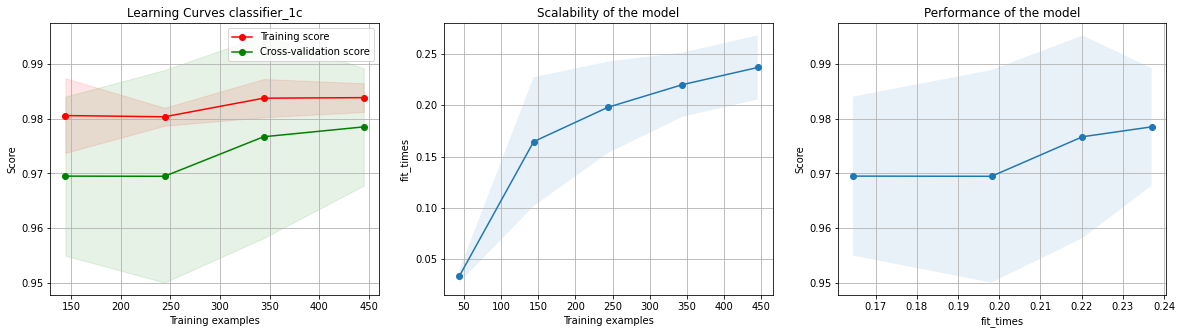

In [ ]:
plot_learning_curve(loaded_model_combined, 'Learning Curves classifier_1c', X_train_final, y_train)
plt.show()

In [ ]:
grid_classifier_combined = loaded_model_combined.score(X_train_final, y_train)
print(f'Accuracy on train set  is {grid_classifier_combined}')

Accuracy on train set  is 0.9820466786355476


In [ ]:
X_test_cleaned = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(X_test)

In [ ]:
X_test_cleaned_sparse_embed = model_folder / 'x_test_cleaned_sparse_embed.pkl'

In [ ]:
joblib.dump(X_test_cleaned, X_test_cleaned_sparse_embed)

['/content/drive/MyDrive/datasets/models/x_test_cleaned_sparse_embed.pkl']

In [ ]:
# Final Pipeline
def final_pipeline(text):
  #cleaned_text = cp.SpacyPreprocessor(model = 'en_core_web_sm', remove_stop=True).transform(text)
  cleaned_text = joblib.load(X_test_cleaned_sparse_embed)
  X_features, feature_names  = featurizer.fit_transform(text)
  X_final = pd.concat((pd.DataFrame(cleaned_text, columns =['cleaned_text']),
                           pd.DataFrame(X_features, columns=feature_names)),axis =1)

  predictions = loaded_model_combined.predict(X_final)
  return predictions

In [ ]:
y_test_pred = final_pipeline(X_test)

In [ ]:
print('\nTest set classification report:\n\n',classification_report(y_test, y_test_pred ))


Test set classification report:

               precision    recall  f1-score   support

         ham       0.99      1.00      0.99       484
        spam       0.97      0.90      0.94        73

    accuracy                           0.98       557
   macro avg       0.98      0.95      0.96       557
weighted avg       0.98      0.98      0.98       557

